In [1]:
import pandas as pd
import sqlite3

In [2]:
%%capture
!pip install ipython-sql --quiet
%load_ext sql

In [5]:
#Reading the data
df=pd.read_excel('/content/Amazon Sale Report.xlsx')

In [6]:
#Discovering the data
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [7]:
df.shape

(128976, 21)

In [8]:
# Checking data types and format
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   index               128976 non-null  int64         
 1   Order ID            128976 non-null  object        
 2   Date                128976 non-null  datetime64[ns]
 3   Status              128976 non-null  object        
 4   Fulfilment          128976 non-null  object        
 5   Sales Channel       128976 non-null  object        
 6   ship-service-level  128976 non-null  object        
 7   Category            128976 non-null  object        
 8   Size                128976 non-null  object        
 9   Courier Status      128976 non-null  object        
 10  Qty                 128976 non-null  int64         
 11  currency            121176 non-null  object        
 12  Amount              121176 non-null  float64       
 13  ship-city           128941 no

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   index               128976 non-null  int64         
 1   Order ID            128976 non-null  object        
 2   Date                128976 non-null  datetime64[ns]
 3   Status              128976 non-null  object        
 4   Fulfilment          128976 non-null  object        
 5   Sales Channel       128976 non-null  object        
 6   ship-service-level  128976 non-null  object        
 7   Category            128976 non-null  object        
 8   Size                128976 non-null  object        
 9   Courier Status      128976 non-null  object        
 10  Qty                 128976 non-null  int64         
 11  currency            121176 non-null  object        
 12  Amount              121176 non-null  float64       
 13  ship-city           128941 no

In [10]:
#drop New and PendingS columns as they are empty
df.drop(columns=['New', 'PendingS'], inplace=True)
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

In [11]:
#Looking for duplicated rows
df.duplicated().sum()

np.int64(168)

In [12]:
#Droping the duplicated row
df.drop_duplicates(inplace=True)

In [13]:
df.shape

(128808, 19)

In [14]:
#Converting the columns names to snake format
def clean_column_names(columns):
    return columns.str.strip().str.lower().str.replace(r'[^\w\s]', '_', regex=True).str.replace(r'\s+', '_', regex=True)

df_cleaned = df.copy()
df_cleaned.columns = clean_column_names(df_cleaned.columns)
df_cleaned

,index,order_id,date,status,fulfilment,sales_channel,ship_service_level,category,size,courier_status,qty,currency,amount,ship_city,ship_state,ship_postal_code,ship_country,b2b,fulfilled_by
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128971,128970,406-6001380-7673107,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,False,NaN
128972,128971,402-9551604-7544318,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,1,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,False,NaN
128973,128972,407-9547469-3152358,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,Blazzer,XXL,Shipped,1,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,False,NaN
128974,128973,402-6184140-0545956,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,1,INR,1199.00,Halol,Gujarat,389350.0,IN,False,NaN


In [15]:
# Connect to SQLite and create a database
conn = sqlite3.connect("amazon_sales.db")  # This creates 'amazon_sales.db'

# Write the data to a table in SQLite
df_cleaned.to_sql("amazon_sales", conn, if_exists="replace", index=False)

print("Database and table created successfully!")

Database and table created successfully!


In [16]:
%sql sqlite:///amazon_sales.db

In [17]:
%config SqlMagic.style = '_DEPRECATED_DEFAULT'

In [18]:
# Mathematical checks where necessary (sum, min, max)
df_cleaned.describe()

,index,date,qty,amount,ship_postal_code
count,128808.000000,128808,128808.000000,121019.000000,128775.00000
mean,64564.582906,2022-05-12 12:17:48.529904896,0.904416,648.631921,463957.07107
min,0.000000,2022-03-31 00:00:00,0.000000,0.000000,110001.00000
25%,32368.750000,2022-04-20 00:00:00,1.000000,449.000000,382421.00000
50%,64570.500000,2022-05-10 00:00:00,1.000000,605.000000,500033.00000
75%,96772.250000,2022-06-04 00:00:00,1.000000,788.000000,600024.00000
max,128974.000000,2022-06-29 00:00:00,15.000000,5584.000000,989898.00000
std,37193.614079,NaN,0.313373,281.224583,191478.52940


In [19]:
df_cleaned

,index,order_id,date,status,fulfilment,sales_channel,ship_service_level,category,size,courier_status,qty,currency,amount,ship_city,ship_state,ship_postal_code,ship_country,b2b,fulfilled_by
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128971,128970,406-6001380-7673107,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,False,NaN
128972,128971,402-9551604-7544318,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,1,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,False,NaN
128973,128972,407-9547469-3152358,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,Blazzer,XXL,Shipped,1,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,False,NaN
128974,128973,402-6184140-0545956,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,1,INR,1199.00,Halol,Gujarat,389350.0,IN,False,NaN


In [ ]:
#Now, we are going to see the distinct values in each column

In [20]:
%%sql
select distinct Status from amazon_sales

 * sqlite:///amazon_sales.db
Done.


status
Cancelled
Shipped - Delivered to Buyer
Shipped
Shipped - Returned to Seller
Shipped - Rejected by Buyer
Shipped - Lost in Transit
Shipped - Out for Delivery
Shipped - Returning to Seller
Shipped - Picked Up
Pending


In [21]:
%%sql
select distinct Fulfilment  from amazon_sales

 * sqlite:///amazon_sales.db
Done.


fulfilment
Merchant
Amazon


In [22]:
%%sql
select distinct sales_channel from amazon_sales

 * sqlite:///amazon_sales.db
Done.


sales_channel
Amazon.in
Non-Amazon


In [23]:
%%sql
select distinct "ship_service_level" from amazon_sales

 * sqlite:///amazon_sales.db
Done.


ship_service_level
Standard
Expedited


In [24]:
%%sql
select distinct "category" from amazon_sales

 * sqlite:///amazon_sales.db
Done.


category
T-shirt
Shirt
Blazzer
Trousers
Perfume
Socks
Shoes
Wallet
Watch


In [25]:
%%sql
select distinct "size" from amazon_sales

 * sqlite:///amazon_sales.db
Done.


size
S
3XL
XL
L
XXL
XS
6XL
M
4XL
Free


In [26]:
%%sql
select distinct "courier_status" from amazon_sales

 * sqlite:///amazon_sales.db
Done.


courier_status
On the Way
Shipped
Cancelled
Unshipped


In [27]:
#Identifying zero/blank/null values
%%sql
SELECT count(*)
FROM amazon_sales
WHERE (amount IS NULL OR amount = 0)
  AND (status <> "Cancelled" OR courier_status <> "Unshipped");

 * sqlite:///amazon_sales.db
Done.


count(*)
10128


In [28]:
# Removing null and zero values from amount where the status is canceled or unshipped
%%sql
UPDATE amazon_sales
SET amount = (
             SELECT AVG(amount)
             FROM amazon_sales
             WHERE NOT ((amount IS NULL OR amount = 0)
             AND (status <> "Cancelled" OR courier_status <> "Unshipped")))
  where ((amount IS NULL OR amount = 0)
  AND (status <> "Cancelled" OR courier_status <> "Unshipped"));

 * sqlite:///amazon_sales.db
10128 rows affected.


[]

In [29]:
#Count the null values in city, state, postalcode, and country
%%sql
SELECT COUNT(*)
FROM amazon_sales
WHERE ship_city IS NULL
  AND ship_state IS NULL
  AND ship_postal_code IS NULL
  AND ship_country IS NULL;

 * sqlite:///amazon_sales.db
Done.


COUNT(*)
33


In [30]:
#Droping the rows with null values in city, state, postalcode, and country
%%sql
Delete from amazon_sales
WHERE ship_city IS NULL
  AND ship_state IS NULL
  AND ship_postal_code IS NULL
  AND ship_country IS NULL;

 * sqlite:///amazon_sales.db
33 rows affected.


[]

In [31]:
#Counting the nulls in currency
%%sql
select count(*) from amazon_sales where "currency" is null

 * sqlite:///amazon_sales.db
Done.


count(*)
7787


In [32]:
#Filling out the nulls in currency column with "INR"
%%sql
Update amazon_sales set "currency" = "INR" where "currency" is null

 * sqlite:///amazon_sales.db
7787 rows affected.


[]

In [33]:
#Counting the nulls in fulfilled by column
%%sql
select count(*) from amazon_sales where "fulfilled_by" is null

 * sqlite:///amazon_sales.db
Done.


count(*)
89575


In [34]:
#Filling out the nulls in fulfilled by coulmn with "others" value
%%sql
Update amazon_sales set "fulfilled_by" = "others" where "fulfilled_by" is null

 * sqlite:///amazon_sales.db
89575 rows affected.


[]

In [35]:
#ignore this ya razan
%%sql

Select count(*) from (
select order_id, count(*)
from amazon_sales
Group by order_id
having count(*)>1);


 * sqlite:///amazon_sales.db
Done.


count(*)
6829


In [36]:
#counting the number of dupliactes in the order_ids
%%sql
Select sum(count) from (
select order_id, count(*) as count
from amazon_sales
Group by order_id
having count(*)>1) ;

 * sqlite:///amazon_sales.db
Done.


sum(count)
15403


In [37]:
#droping the rows with duplicated order ids, not keeping the original one, as we dont know the original one
%%sql
DELETE FROM amazon_sales
WHERE order_id IN (
    SELECT order_id
    FROM (
        SELECT order_id
        FROM amazon_sales
        GROUP BY order_id
        HAVING COUNT(*) > 1
    ) AS duplicate_orders
);

 * sqlite:///amazon_sales.db
15403 rows affected.


[]

In [38]:
%%sql
select count (*) from(
  select distinct order_id from amazon_sales)

 * sqlite:///amazon_sales.db
Done.


count (*)
113372


In [39]:
#Counting the rows with zero quantity
%%sql
select count(*) from amazon_sales where qty = 0;

 * sqlite:///amazon_sales.db
Done.


count(*)
11361


In [40]:
#Deleting the rows with zero qty
%%sql
Delete from amazon_sales where qty = 0;

 * sqlite:///amazon_sales.db
11361 rows affected.


[]

In [41]:
# now it is the time to use the cleaned dataset for some fun
query = "SELECT * FROM amazon_sales"
df_cleaned = pd.read_sql_query(query, conn)

In [42]:
df_cleaned.shape

(102011, 19)

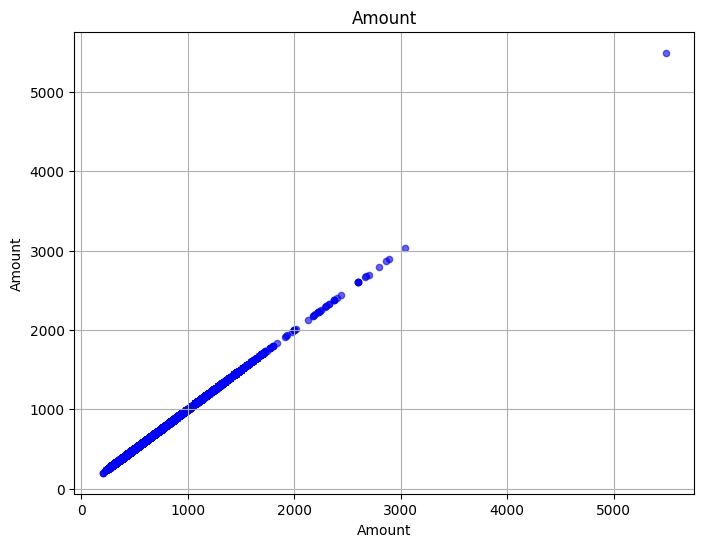

In [43]:
#Creating a scatter plot for the amountto see if there is outliers
import matplotlib.pyplot as plt
df_cleaned.plot.scatter(x='amount', y='amount', color='blue', alpha=0.6, figsize=(8, 6))
plt.title("Amount")
plt.xlabel("Amount")
plt.ylabel("Amount")
plt.grid()
plt.show()

In [44]:
#it seems we have a one outlier abouve the 4000, so we want to include the values that are equal or less than 4000 in our analysis
df_cleaned = df_cleaned.query('amount <= 4000')

In [ ]:
#Now we are ready to start our analysis

In [45]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102009 entries, 0 to 102010
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               102009 non-null  int64  
 1   order_id            102009 non-null  object 
 2   date                102009 non-null  object 
 3   status              102009 non-null  object 
 4   fulfilment          102009 non-null  object 
 5   sales_channel       102009 non-null  object 
 6   ship_service_level  102009 non-null  object 
 7   category            102009 non-null  object 
 8   size                102009 non-null  object 
 9   courier_status      102009 non-null  object 
 10  qty                 102009 non-null  int64  
 11  currency            102009 non-null  object 
 12  amount              102009 non-null  float64
 13  ship_city           102009 non-null  object 
 14  ship_state          102009 non-null  object 
 15  ship_postal_code    102009 non-null  fl

In [46]:
#We have to change the type of date column to datetime after doing all the cleaning as sql database save the date column as object
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])

#we want to start with knowing the most month that have the highest records
df_cleaned['month'] = df_cleaned['date'].dt.to_period('M')
orders_count = df_cleaned.groupby('month').size()
orders_count

/tmp/ipython-input-547302594.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])
/tmp/ipython-input-547302594.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['month'] = df_cleaned['date'].dt.to_period('M')


,0
month,
2022-03,134
2022-04,38660
2022-05,33289
2022-06,29926


Text(0, 0.5, 'Orders')

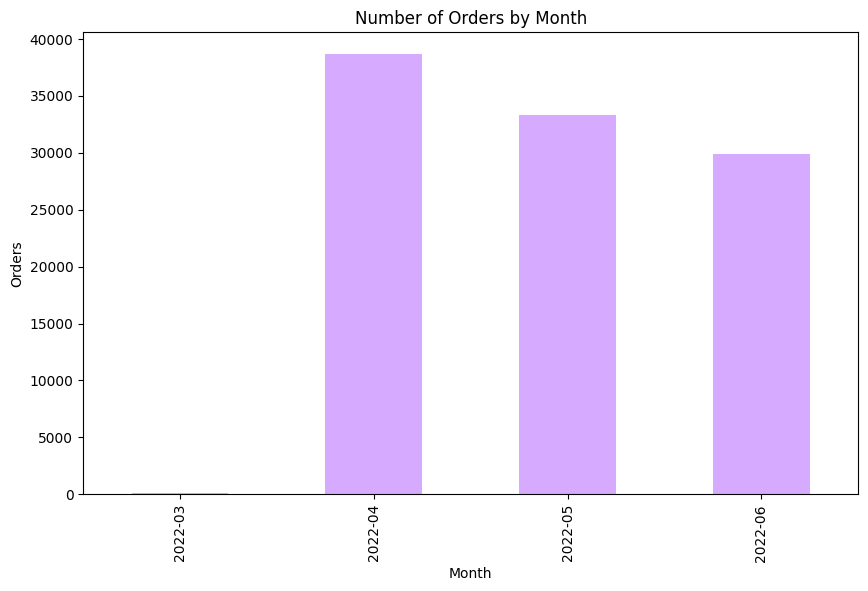

In [51]:
plt.figure(figsize=(10,6))
orders_count.plot(kind='bar', color='#D5AAFF')
plt.title('Number of Orders by Month')
plt.xlabel('Month')
plt.ylabel('Orders')

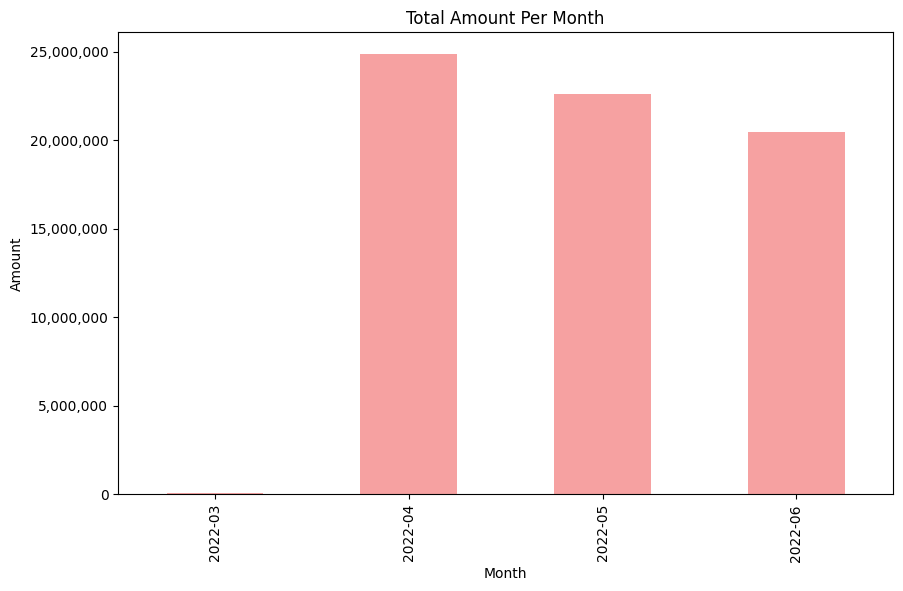

In [52]:

# Plotting the total amount per month
amount_by_month = df_cleaned.groupby('month')['amount'].sum()
amount=amount_by_month.round().astype(int)
plt.figure(figsize=(10, 6))
amount.plot(kind='bar', color='#F6A1A1')
plt.title('Total Amount Per Month')
plt.xlabel('Month')
plt.ylabel('Amount')
from matplotlib.ticker import FuncFormatter
formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
plt.gca().yaxis.set_major_formatter(formatter)


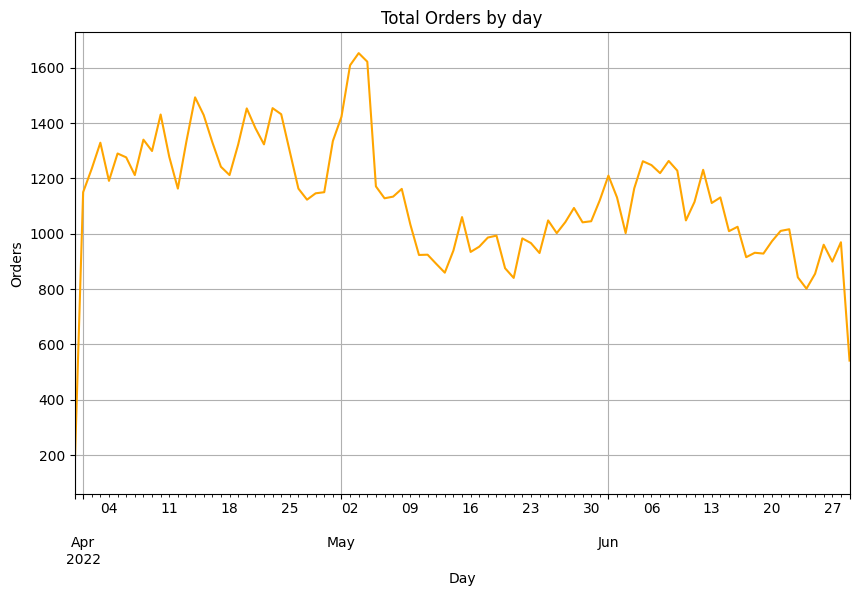

In [53]:

# Plotting the total orders per day
qty_by_day = df_cleaned.groupby('date')['qty'].sum()
plt.figure(figsize=(10, 6))
qty_by_day.plot(kind='line', color='orange')
plt.title('Total Orders by day')
plt.xlabel('Day')
plt.ylabel('Orders')
plt.grid()

Text(0, 0.5, 'Orders')

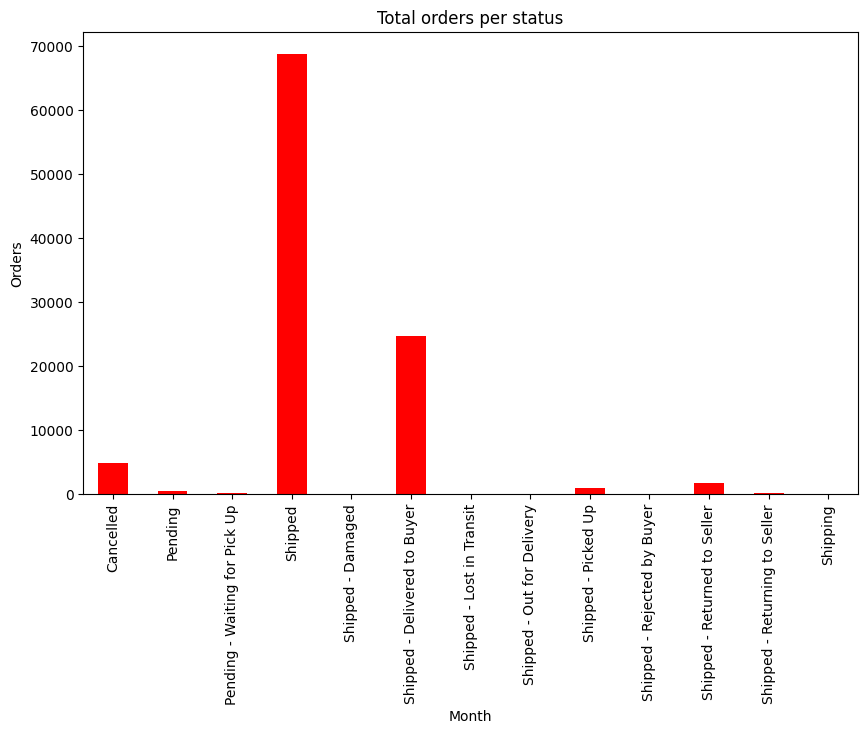

In [54]:
# Plotting the number of orders for each status
status= df_cleaned.groupby('status').size()
plt.figure(figsize=(10, 6))
status.plot(kind='bar', color='red')
plt.title('Total orders per status')
plt.xlabel('Month')
plt.ylabel('Orders')

Text(0, 0.5, 'Orders')

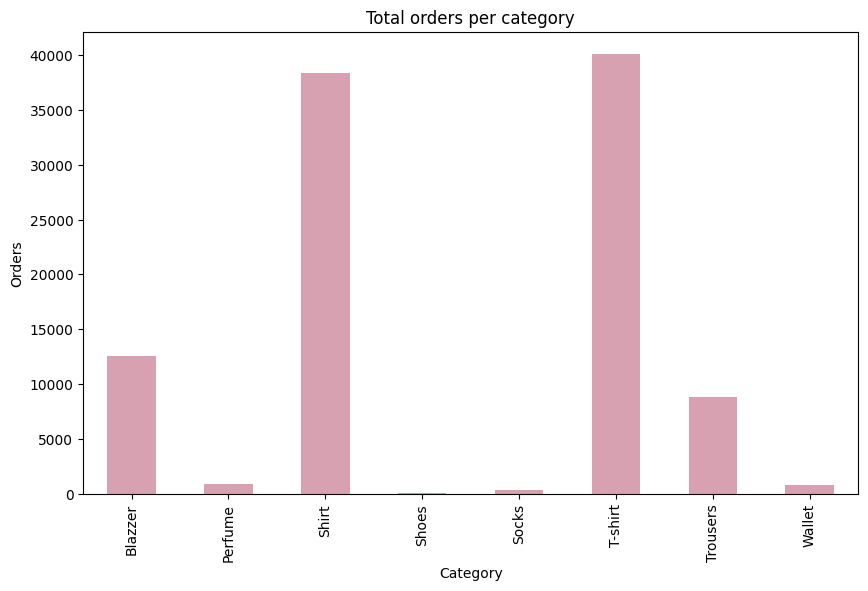

In [55]:
# Plotting the orders per category
category= df_cleaned.groupby('category').size()
plt.figure(figsize=(10, 6))
category.plot(kind='bar', color='#D7A1B2')
plt.title('Total orders per category')
plt.xlabel('Category')
plt.ylabel('Orders')

Text(0, 0.5, 'Orders')

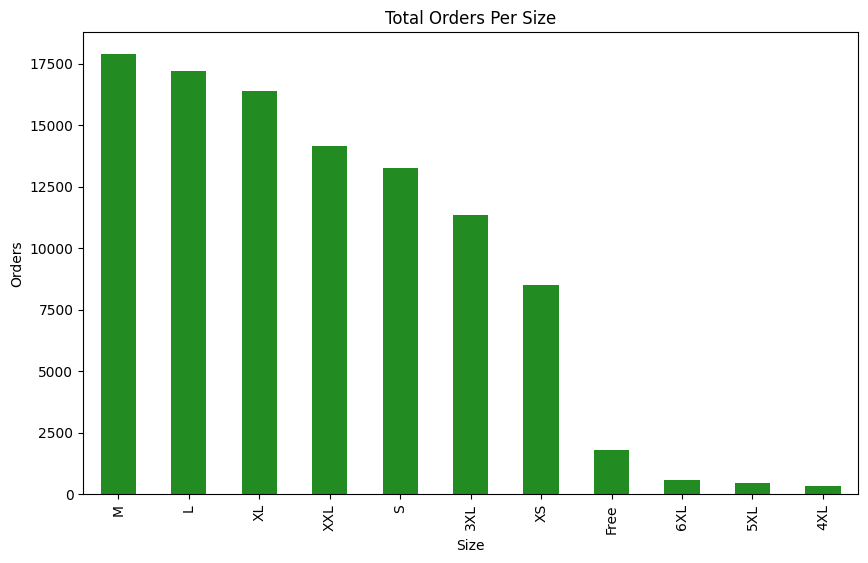

In [57]:
# Plotting the total orders per size
size= df_cleaned.groupby('size').size()
size = size.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
size.plot(kind='bar', color='#228B22')
plt.title('Total Orders Per Size')
plt.xlabel('Size')
plt.ylabel('Orders')

Text(0.5, 1.0, 'Ship Service Level')

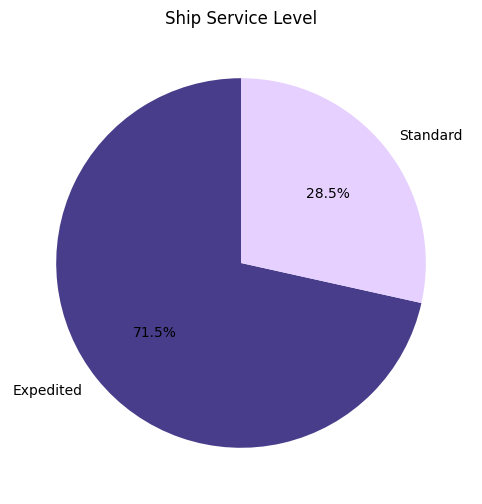

In [58]:
# Plotting the shipping service level
servicelevel= df_cleaned.groupby('ship_service_level').size()
plt.figure(figsize=(10, 6))
colors= colors = ['#483D8B', '#E5D0FF']
servicelevel.plot(kind='pie', colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Ship Service Level')


Text(0, 0.5, 'Orders')

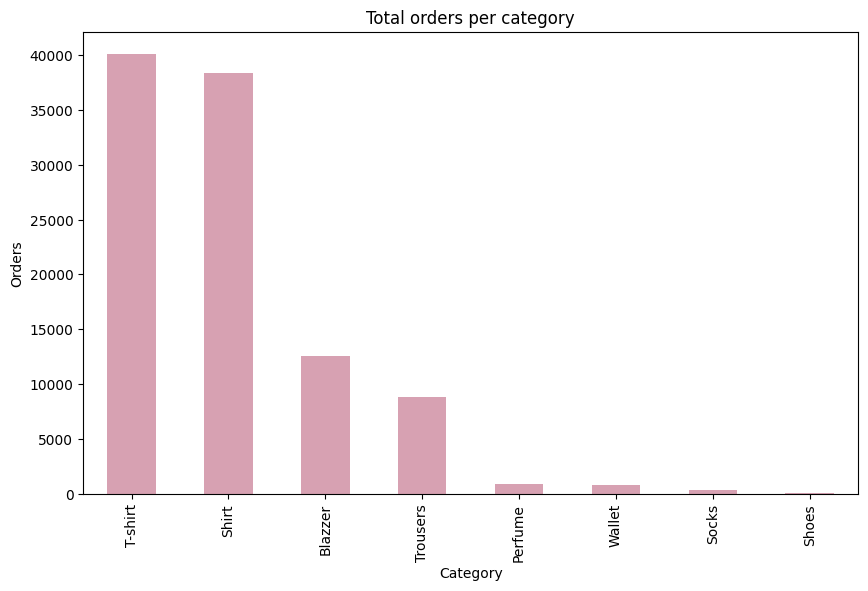

In [60]:
# Plotting the orders per category (or orders count) in ascending order
category= df_cleaned.groupby('category').size()
plt.figure(figsize=(10, 6))
category= category.sort_values(ascending=False)
category.plot(kind='bar', color='#D7A1B2')
plt.title('Total orders per category')
plt.xlabel('Category')
plt.ylabel('Orders')

Text(0, 0.5, 'Orders')

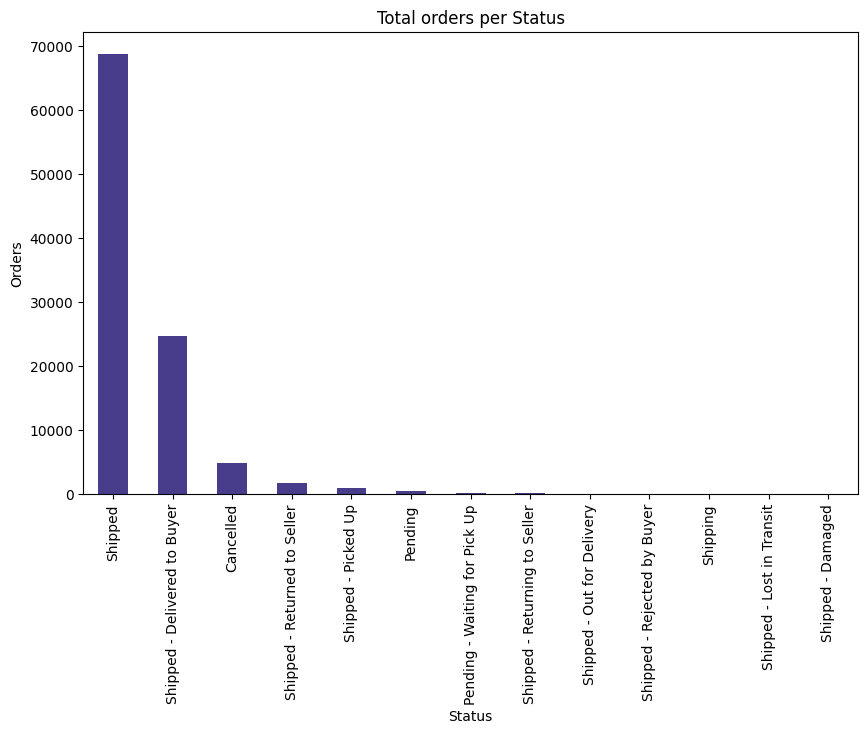

In [65]:
# Plotting the orders per status in ascending order
status= df_cleaned.groupby('status').size()
plt.figure(figsize=(10, 6))
status = status.sort_values(ascending=False)
status.plot(kind='bar', color='#483D8B')
plt.title('Total orders per Status')
plt.xlabel('Status')
plt.ylabel('Orders')


Text(0, 0.5, 'Orders')

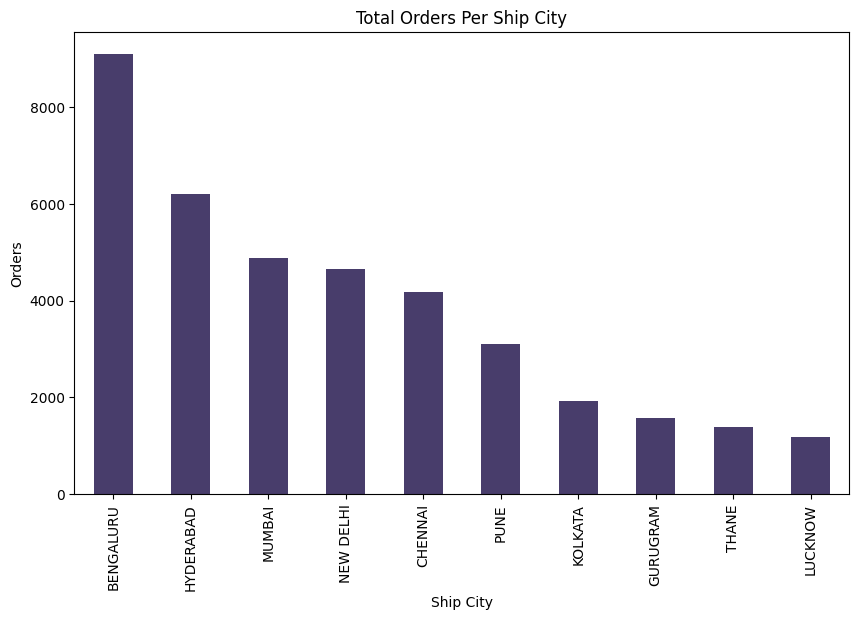

In [66]:
# Plotting the orders per city (top 10 cities)
city= df_cleaned.groupby('ship_city').size()
plt.figure(figsize=(10, 6))
city = city.sort_values(ascending=False).head(10)
city.plot(kind='bar', color='#483D6B')
plt.title('Total Orders Per Ship City')
plt.xlabel('Ship City')
plt.ylabel('Orders')

In [67]:
#Saving the cleaned dataset for dashboard visualization
df_cleaned.to_excel("cleaned_amazonData.xlsx", index=False)